<a href="https://colab.research.google.com/github/LCaravaggio/ClaseTimeSeries/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

Primero importamos todas las librerías necesarias

In [8]:
from google.colab import drive
import json

import requests
from requests.auth import HTTPBasicAuth

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

Por una cuestión de seguridad, tenemos la clave de la API guardada en el drive, así que accedemos a la misma.

In [2]:
drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/alphacast.json", 'r') as f:
    api_token= json.load(f)

Mounted at /content/drive


In [3]:
# Definir user key para la API
user_key = api_token["key"]

Traemos los datos que necesitamos

In [4]:
# EMAE
emae = requests.get('https://api.alphacast.io/datasets/5331/data?apiKey='+user_key+'&&$format=csv', auth=HTTPBasicAuth(user_key, ''))
open('emae.csv','wb').write(emae.content)
emae = pd.read_csv('emae.csv',delimiter = ',')

In [5]:
emae['Date'] = pd.to_datetime(emae['Date'])
emae.set_index('Date', inplace = True)
emae = emae['Emae']
emae.columns = ['EMAE']
emae = emae.loc['2004-01-01':]

Preparamos una función para graficar

In [6]:
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=emae.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig

Y la graficamos. Si bien la serie se estancadesde 2011, claramente su media depende del tiempo, por lo que no podemos quedarnos tranquilos que sea estacionaria. Por otro lado se observa su comportamiento estacional ya que lo que trajimos fue la serie original y no la desestacionalizada. 

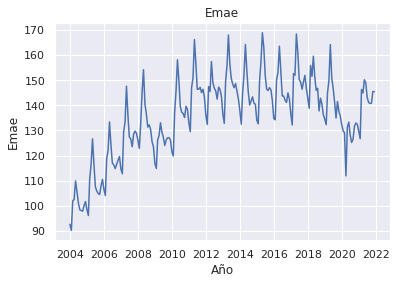

In [9]:
graficar(emae)

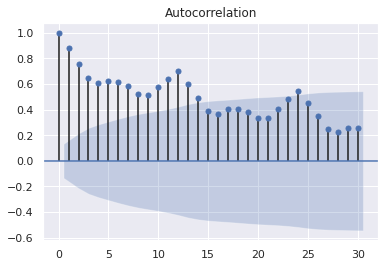

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(emae, lags=30)
plt.show()

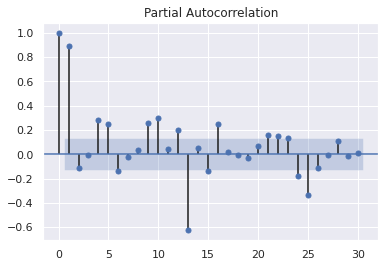

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(emae, lags=30)
plt.show()